In [1]:
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import davies_bouldin_score, calinski_harabaz_score

In [2]:
dataset1 = arff.loadarff(open('curves1.arff','r'))[0]
dataset2 = arff.loadarff(open('zelnik4.arff','r'))[0]
dataset3 = arff.loadarff(open('engytime.arff','r'))[0]
dataset4 = arff.loadarff(open('cure-t0-2000n-2D.arff','r'))[0]
dataset5 = arff.loadarff(open('banana.arff','r'))[0]
dataset6 = arff.loadarff(open('diamond9.arff','r'))[0]

In [3]:
def afficher(dataset,num):
    lst = []
    for i in dataset:
        if i[2].decode("ascii") not in lst:
            lst.append(i[2].decode("ascii"))
    coord = []
    for j in range(len(lst)):
        coord.append([[],[]])
        for i in dataset:
            if i[2].decode("ascii") == lst[j]:
                coord[j][0].append(i[0])
                coord[j][1].append(i[1])
        plt.scatter(coord[j][0],coord[j][1])
    string = "Dataset " + str(num)
    plt.title(string)
    plt.show()

# Utilisation de DBSCAN

In [4]:
def formatage(dataset):
    coord = []
    labels = []
    for i in dataset: 
        coord.append([i[0],i[1]])
        labels.append(i[2].decode('ascii'))
    return np.asarray(labels), np.asarray(coord)

In [33]:
def affichage2(data,DB):
    data = data.transpose()
    plt.scatter(data[0],data[1],c=DB.labels_)
    plt.title('DBSCAN clustering')
    plt.show()

In [6]:
def calc_score(vraies, predites):
    if len(vraies) != len(predites):
        print("les labels ne sont pas de la meme taille")
        return -1
    else:
        somme = 0
        for i in range(len(vraies)):
            if int(vraies[i]) == predites[i]:
                somme +=1
        return somme/len(vraies)

In [29]:
def calc(dataset,epsilon = 0.05,samples = 5,score=True):
    DB = DBSCAN(eps=epsilon, min_samples = samples, n_jobs=-1)
    labels, data = formatage(dataset)
    DB.fit(data)
    affichage2(data,DB)
    if score:
        print("Score vrai : ",calc_score(labels,DB.labels_))
    print("Davies bouldin's score : ",davies_bouldin_score(formatage(dataset)[1],DB.labels_))
    print("Calinski Harabaz's score : ",calinski_harabaz_score(formatage(dataset)[1],DB.labels_))

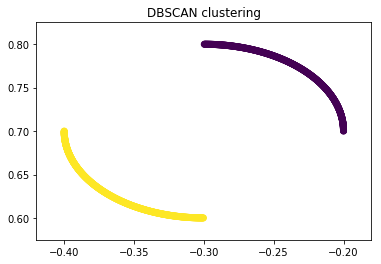

Score vrai :  1.0
Davies bouldin's score :  0.432415665282
Calinski Harabaz's score :  4270.44276804


In [34]:
calc(dataset1)

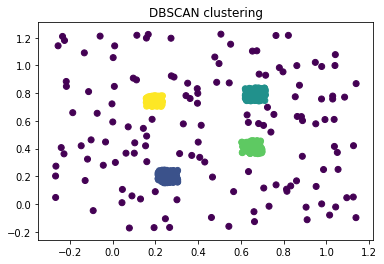

Davies bouldin's score :  1.98982921302
Calinski Harabaz's score :  168.616643397


In [35]:
calc(dataset2,score=False)

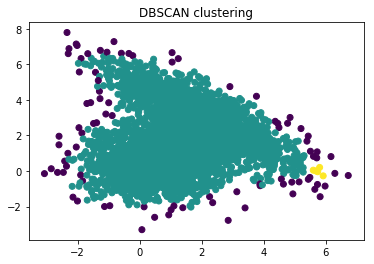

Score vrai :  0.001220703125
Davies bouldin's score :  31.0794412187
Calinski Harabaz's score :  11.4550772941


In [36]:
calc(dataset3,0.3)

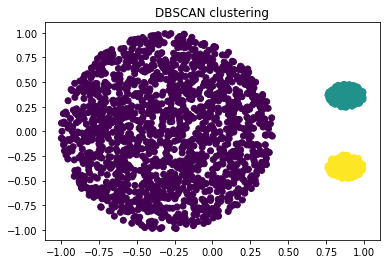

Score vrai :  1.0
Davies bouldin's score :  0.525513653082
Calinski Harabaz's score :  840.15002737


In [41]:
calc(dataset4,0.1)

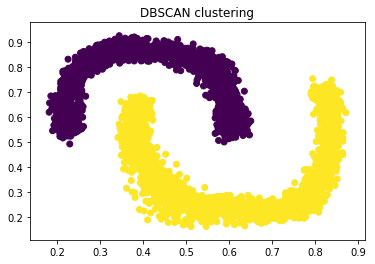

Davies bouldin's score :  1.09889986766
Calinski Harabaz's score :  3751.73046727


In [38]:
calc(dataset5,score=False)

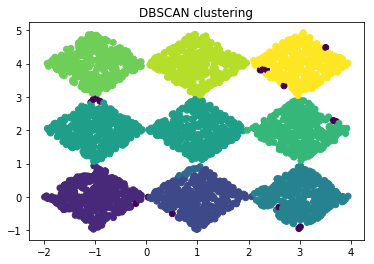

Score vrai :  0.7706666666666667
Davies bouldin's score :  1.63187162327
Calinski Harabaz's score :  2865.66524232


In [39]:
calc(dataset6,0.13) #0.105

In [40]:
def findParam(dataset,minieps,maxieps,minisamples,maxsamples):
    score = []
    ep = []
    samp = []
    labels, data = formatage(dataset)
    for epsilon in np.linspace(minieps,maxieps,50):    
        for samples in range(minisamples,maxsamples):
            DB = DBSCAN(eps=epsilon,min_samples = samples, n_jobs=-1)
            DB.fit(data)
            score.append(calc_score(labels,DB.labels_))
            ep.append(epsilon)
            samp.append(samples)
    return score,ep,samp
    #return max(score), ep[score.index(max(score))], samp[score.index(max(score))]
    
        

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
score, ep, samp = findParam(dataset6,0.1,0.15,3,10)

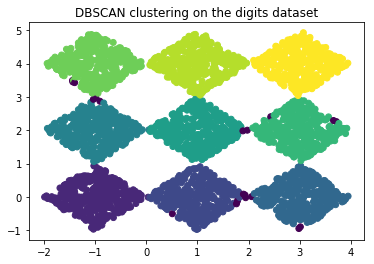

Score vrai :  0.9926666666666667
Davies bouldin's score :  1.79516773347
Calinski Harabaz's score :  4728.23323658


In [31]:
calc(dataset6,epsilon=0.14591836734693878,samples=7)